<a href="https://colab.research.google.com/github/Jowayria-27/Artifical-Intelligence-Project/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Artificial Intelligence Project**


##Neural Network: ANN

In this project, we are aiming to predict customer churn, which means we are trying to predict which customer would unsubscribe from the service and leave the company. It is extremely crucial to be able to know what factors cause consumers to churn, so that firms work on reducing that factors and maintain and retain their customers. Losing customers lead to several consquences including loss of profit, loss of reputation, and a decrease in sales. Hence, businesses nowadays are attempting to train machines to know what factors are increasing customer churn. Other companies attempt to know which factors decrease customer churn, so that they can create retention campaigns.

Link: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

NOTE: If this notebook is going to be run, you will have to select the kaggle.json file that is there in the project folder.

---



## **First Step: Data Exploration Analysis**


We will let the code read the CSV and explore the dataset through the Kaggle API

First of all, we will import all the libraries needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import statistics as s

%matplotlib inline
sns.set()

Then, we will use pip to install the kaggle library and upload the Kaggle API

In [2]:
!pip install Kaggle

In [23]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jowayriakhaled","key":"297cfce9daeb8a9afccf14a2cb864597"}'}

Next, we will create a directory named Kaggle and copy this file into this new directory

In [24]:
import os

os.makedirs('/root/.kaggle/', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

Finally, we will now download the dataset from Kaggle

In [25]:
!kaggle datasets download -d radheshyamkollipara/bank-customer-churn

Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
100% 307k/307k [00:00<00:00, 652kB/s]
100% 307k/307k [00:00<00:00, 651kB/s]


Next, we will unzip the dataset

In [26]:
!unzip /content/bank-customer-churn.zip -d /content/

Archive:  /content/bank-customer-churn.zip
  inflating: /content/Customer-Churn-Records.csv  


Finally, we will read the data

In [27]:
import pandas as pd
df = pd.read_csv('/content/Customer-Churn-Records.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Next, we will start with exploring the data for any missing values. Based on the data shown below, there are 10,000 rows and 18 columns. Fortunately, there are no missing data in each of the columns.



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CreditScore         10000 non-null  int64   
 1   Geography           10000 non-null  object  
 2   Gender              10000 non-null  object  
 3   Age                 10000 non-null  int64   
 4   Tenure              10000 non-null  int64   
 5   Balance             10000 non-null  float64 
 6   NumOfProducts       10000 non-null  int64   
 7   HasCrCard           10000 non-null  int64   
 8   IsActiveMember      10000 non-null  int64   
 9   EstimatedSalary     10000 non-null  float64 
 10  Exited              10000 non-null  int8    
 11  Complain            10000 non-null  int64   
 12  Satisfaction Score  10000 non-null  int64   
 13  Card Type           10000 non-null  category
 14  Point Earned        10000 non-null  int64   
dtypes: category(1), float64(2), int64(9),

In [30]:
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() < 10:  # Categorical check (e.g., strings or few unique values)
        print(f"{i}: {df[i].unique()}")
    else:  # Numeric check
        print(f"{i}: Min = {df[i].min()}, Max = {df[i].max()}")

RowNumber: Min = 1, Max = 10000
CustomerId: Min = 15565701, Max = 15815690
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: Min = 350, Max = 850
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Age: Min = 18, Max = 92
Tenure: Min = 0, Max = 10
Balance: Min = 0.0, Max = 250898.09
NumOfProducts: [1 3 2 4]
HasCrCard: [1 0]
IsActiveMember: [1 0]
EstimatedSalary: Min = 11.58, Max = 199992.48
Exited: [1 0]
Complain: [1 0]
Satisfaction Score: [2 3 5 4 1]
Card Type: ['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
Point Earned: Min = 119, Max = 1000


Each Column reprsents a different thing concerning the stock:
1. Row Number: It just describes where the row is positioned in the dataset
2. Customer ID: it uniquely represents the customers in the dataset through a number
3. Surname: the last name of the customer
4. Credit_Score: It is a number that represents the customer's ability and reliability to return money he/she borrows. The higher the number, the more likely a person would be trusted by the bank to borrow money. The lowest range is 350-649 and that is poor so loans would be less likely to be approved while the highest is 750-850 which is the excellent category and can easily be borrowed
5. Geography: Which country the customer is from. This dataset has customers mainly from France, Spain, and Germany
6. Gender: The gender of the customer which is either male or female
7. Age: the age of customers. Ages range from 18 to 92
8. Tenure: duration of the customer having the credit card and how long he/she has been using it in years. The customer that stayed the longest stayed for 10 years
9. Balance: how much the customer owes the bank in Euros. The most a customer has owned was 250,898 Euros
10. NumofProducts: The number of services a customer is subscribed in. Some of those services include saving accounts, debit account, credit acccount, etc..
11. HasCrcard: if customer owns a credit card or not
12. IsActiveMember: Whether the person has been actively and recently using services
13. Estimated Salary: the customer's annual income
14. Exited: if the customer churned/ unsubscribed from the bank
15. Complain: if the customer has filed a complaint against the bank before or not
16. Satisfaction Score: It is a rating of 1-5 of how satisfied the customer is with the service. 1 being unsatisfed and 5 being satisfied
17. Card Type: What card type the user holds and there are 4 types: Diamond, Gold, Silver and Platinum. Diamond being for the most exclusive and important customers and Silver being for regular customers
18. Point Earned: The total amount of reward points the customer has collected through using the card. The highest points earend was 1000.

Next, we are going to find the frequency, mode, mean, median, and other statistics of the data using describe

In [31]:
df.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


Based on the data above, we can conclude the following:
1. Mean Credit Score is 650 while median is 652, so the credit score is almost normally distributed. 650 score is a fair score so majority of people are in the fair score
2. Half of the customers are from France
3. More than half this dataset is Male
4. Average Age of customers is between 37-38
5. The average and median of people had a 5 year tenure meaning that they stayed with the bank for 5 years
6. The mean balance customers owe to the bank is 76485 Euros but the median is 97198 Euros meaning that distribution is left skewed meaning that there are some outliers that are small in value
7. Majority of people subscribed to one product
8. 70% of the people in this dataset has credit cards
9. Half of the people in this dataset are active members and have been recently using their cards
10. The average annual salary for all customers is 100,090 Euros
11. 20% of this dataset has churned
12. The average satisfaction score is 3
13. Only 20% of the customers have filed a complain
14. Almost 1/4th of the customrs have the diamond credit card type
15. The average points earned is 606 while median is 650


Next, we will drop all the unnecessary columns (rownumber, customerID, and surname) so we can prepare our data

In [32]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


Then, we will convert the card type into ordinal categorical data as there is a order of Diamond, Platinum, Gold, and Silver

In [34]:
df['Card Type'] = pd.Categorical(df['Card Type'],
                                      categories=['SILVER', 'GOLD', 'PLATINUM','DIAMOND'],
                                      ordered=True)
df['Card Type']

,Card Type
0,DIAMOND
1,DIAMOND
2,DIAMOND
3,GOLD
4,GOLD
...,...
9995,DIAMOND
9996,PLATINUM
9997,SILVER
9998,GOLD


Next, let's determine the entropy for the columns

In [35]:
from scipy.stats import entropy

# Loop through each column in the dataset
for col in df.columns:
    # Calculate the probabilities for the column
    prob_col = df[col].value_counts() / df[col].size

    # Compute the entropy
    col_entropy = entropy(prob_col, base=2)

    # Print the entropy of the column
    print(f'Entropy of {col}: {col_entropy}')



Entropy of CreditScore: 8.473776396422297
Entropy of Geography: 1.4985795298480267
Entropy of Gender: 0.9939654731937201
Entropy of Age: 5.305675269234496
Entropy of Tenure: 3.4105774680653966
Entropy of Balance: 9.011809359392855
Entropy of NumOfProducts: 1.1953038766627084
Entropy of HasCrCard: 0.8744634652266465
Entropy of IsActiveMember: 0.9993420021661021
Entropy of EstimatedSalary: 13.28751237954944
Entropy of Exited: 0.7294632993589241
Entropy of Complain: 0.730641286246473
Entropy of Satisfaction Score: 2.32168627960293
Entropy of Card Type: 1.9999972883540322
Entropy of Point Earned: 9.554446951654974


In [36]:
import numpy as np

# Loop through each column in the dataset
for col in df.columns:
    # Calculate the number of unique values in the column
    n = df[col].nunique()

    # Calculate log2(n) if n > 0
    log2_n = np.log2(n) if n > 0 else 0

    # Print the result
    print(f'Column: {col}, Unique values: {n}, log2(n): {log2_n}')

Column: CreditScore, Unique values: 460, log2(n): 8.845490050944376
Column: Geography, Unique values: 3, log2(n): 1.584962500721156
Column: Gender, Unique values: 2, log2(n): 1.0
Column: Age, Unique values: 70, log2(n): 6.129283016944966
Column: Tenure, Unique values: 11, log2(n): 3.4594316186372973
Column: Balance, Unique values: 6382, log2(n): 12.639792893279312
Column: NumOfProducts, Unique values: 4, log2(n): 2.0
Column: HasCrCard, Unique values: 2, log2(n): 1.0
Column: IsActiveMember, Unique values: 2, log2(n): 1.0
Column: EstimatedSalary, Unique values: 9999, log2(n): 13.287568102831404
Column: Exited, Unique values: 2, log2(n): 1.0
Column: Complain, Unique values: 2, log2(n): 1.0
Column: Satisfaction Score, Unique values: 5, log2(n): 2.321928094887362
Column: Card Type, Unique values: 4, log2(n): 2.0
Column: Point Earned, Unique values: 785, log2(n): 9.61654884377899


The lowest entropy is 0, while the highest entropy is log2(n) with n standing for the unique values in the column. All columns have high entropies; however



* Points Earned
* Card Type
* Satisfaction Score
* Estimated Salary
* Active Member
* Credit Score
* Geography
* Gender
* Tenure

All have extremely high entropy and does not have a pattern so far

While the Exited (Churn), Complain, Gender, Age, Balance, and Number of products have a high entropy but not as high. The entropy ratio is slightly smaller than the attributes mentioned at the beginning.




Next, let's check for any class imbalance

In [39]:
df['Exited'] = df['Exited'].astype('category').cat.codes
df['Exited'].value_counts()/df['Exited'].count()

,count
Exited,
0,0.7962
1,0.2038


There is a class imbalance as only 20% of this dataset did churn while the rest of the dataset did not churn.

## **Second Step: Data Visualization**

Next, we are going to create a correlation matrix and visualize the data we have so that we can better explore our data

First, the correlation matrix

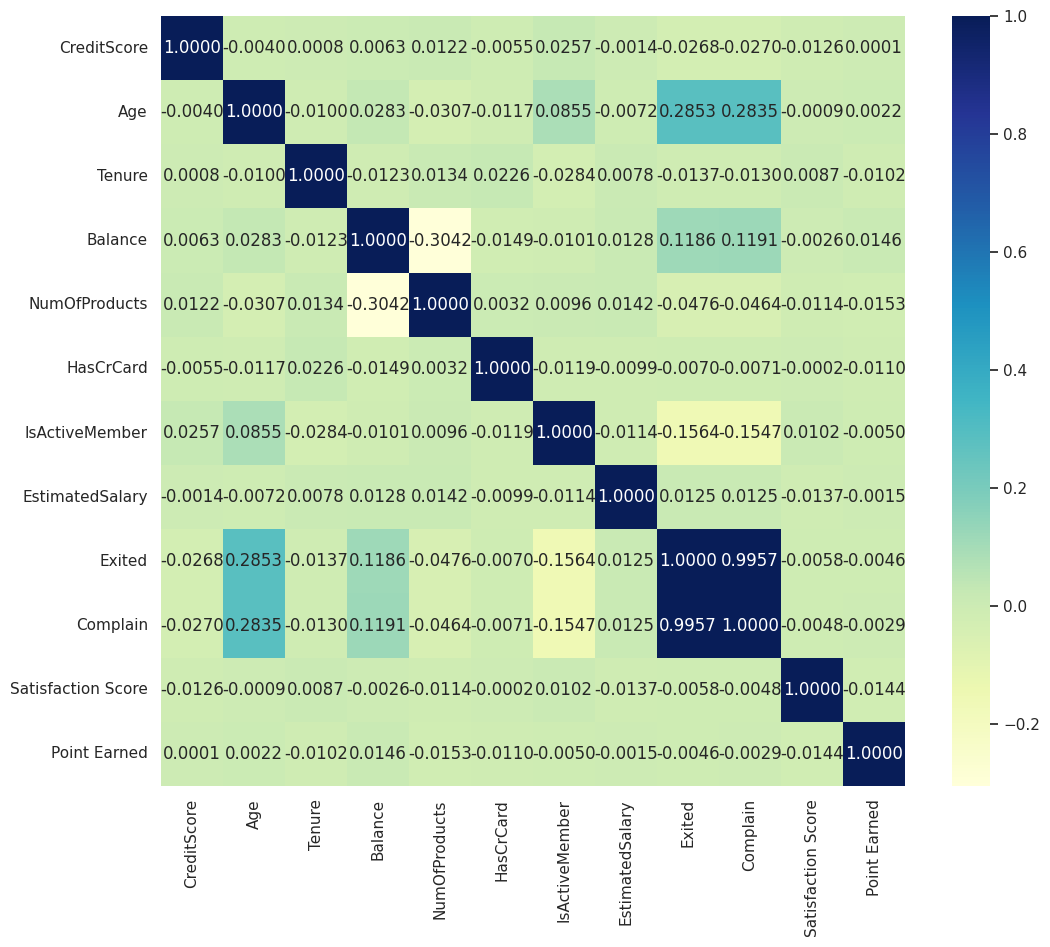

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr(numeric_only=True)

# Set up the figure size
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".4f")

# Show the plot
plt.show()

Based on this data, there is an extremely high positive correlation between the open, high, low, and close prices which is very logical in the stock business since when a stock price increases or decreases in a day, it doesn't increase or decrease by a lot. It does not fluctuate a lot. In addition to that, if the stock price is at a high price, then the open, high, low, and closing price will also be high as well. Hence, there is an extremely strong correlation between the prices.

However, the correlation is not as strong between the volume and the prices. There is a slight positive correlation as the more amounts of stocks sold, the more it is of interest, and it would maintain a high cost. However, at the end of the day, volume measures the amount sold rather than the price. Volume just shows if the stock is trending, and is not usually a direct predictor of price as stocks are very volatile and can change due to many factors.

Now, we are going to graph our columns so we can see if they are following a posiitve or negative trend

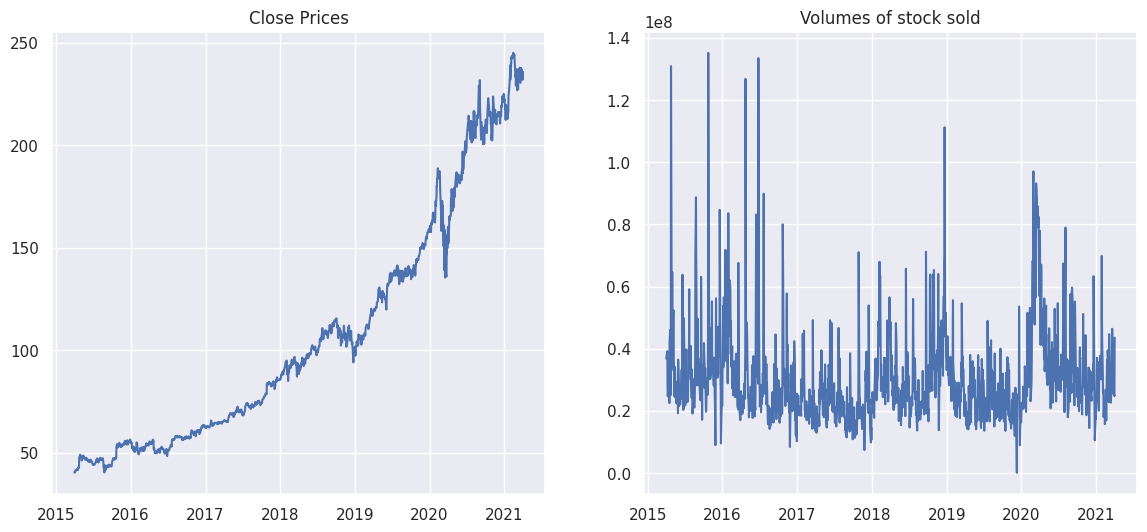

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
plt.plot(df['Date'], df['Close'])
plt.title('Close Prices')


ax = f.add_subplot(122)
plt.plot(df['Date'], df['Volume'])
plt.title('Volumes of stock sold')
plt.show()



<ipython-input-45-41d59db693da>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-45-41d59db693da>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)
<ipython-input-45-41d59db693da>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


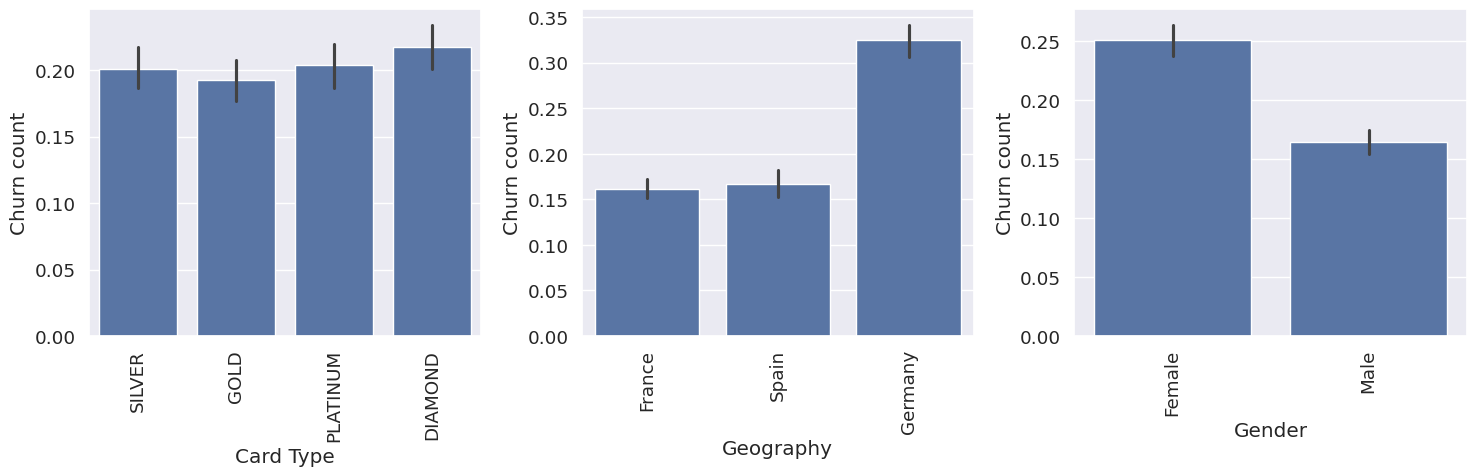

In [45]:
import math

categorical_features = []
categorical_features.append('Card Type')
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)


# Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)

# Calculate the number of rows and columns for the grid based on the number of categorical features
n_features = len(categorical_features)
n_cols = 3  # You can set this to the number of columns you want
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, column in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    g = sns.barplot(x=column, y='Exited', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn count')
    plt.xlabel(f'{column}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Based on the bar plot above, all card types almost have the same churn rate. However, for gender, women are more likely to churn than men. For countries, German customers are more likely to churn than customers of Spain and France, but that might be biased by the fact that more than half the dataset is Germany.

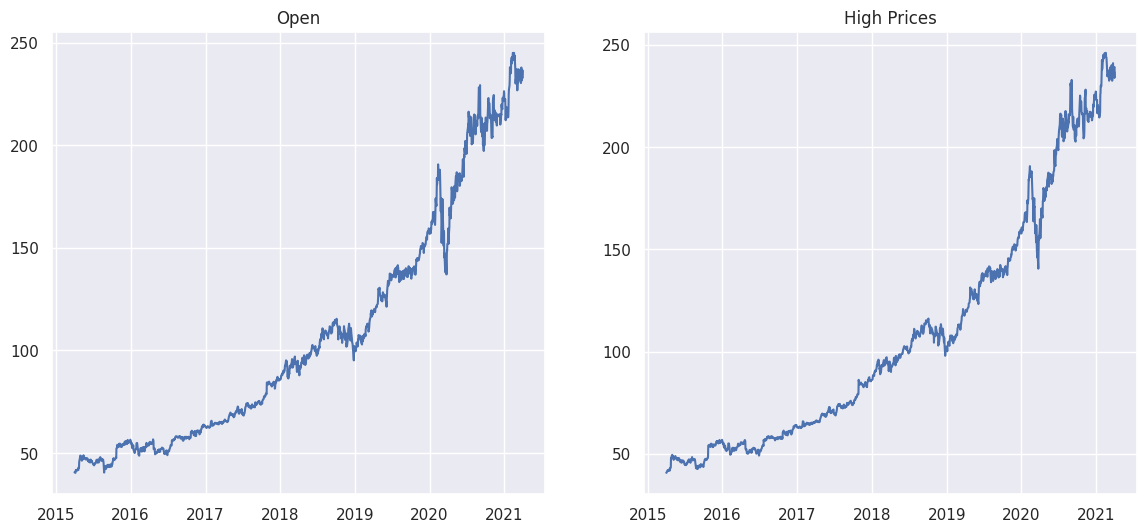

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
plt.plot(df['Date'], df['Open'])
plt.title('Open')


ax = f.add_subplot(122)
plt.plot(df['Date'], df['High'])
plt.title('High Prices')
plt.show()

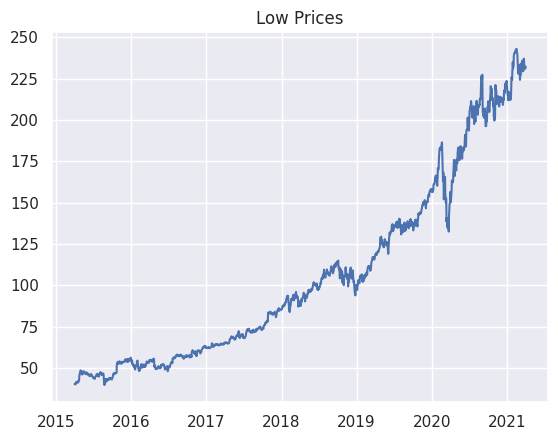

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Date'], df['Low'])
plt.title('Low Prices')
plt.show()



As seen above, all the prices follow an upward trend overall across the years. However, it has taken a hit in 2020 due to COVID. However, the volume follows no certain trend

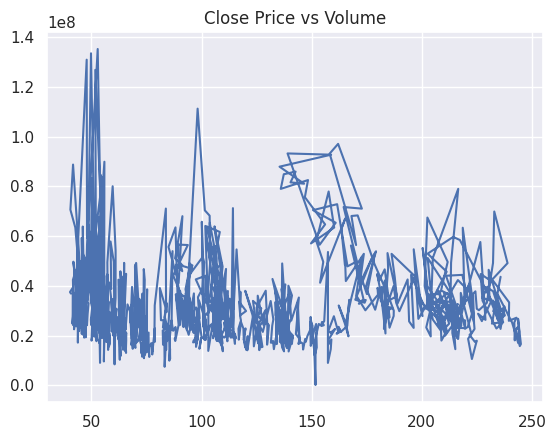

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Close'], df['Volume'])
plt.title('Close Price vs Volume')
plt.show()

The graph above goes to show that there is almost no correlation between the stock price and volume as the line keeps rising and falling rather than following a straight line

## **Third Step: Creation and Analysis of the states we want to predict**

Now, since we want to predict stock fluctuations, we will now create a new column that determines if the stock price increased, decreased or stayed the same from the day previous. After research, the best way to know that difference is to calculate the trade gap which gives the difference betweem the opening price of the new day and the closing price of the previous day. This is usually the most significant change, and what determines how the fluctuations will be like for the day. Trading gaps are usually more used in order to know flucutations across the days rather than through out the day. Hence, it is more preferred for predictions for future fluctuations

In [ ]:
df['Trading_Gap'] = df['Open']-df['Close'].shift(1)
df['Gap_Label'] = np.where(df['Trading_Gap'] > 0, 'Up',
                           np.where(df['Trading_Gap'] < 0, 'Down', 'Stable'))
df.head(10)

,Date,Open,High,Low,Close,Volume,Trading_Gap,Gap_Label
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN,Stable
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.06,Down
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,0.05,Up
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,0.06,Up
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.05,Down
5,2015-04-09 16:00:00,41.25,41.62,41.25,41.48,25723861,-0.17,Down
6,2015-04-10 16:00:00,41.63,41.95,41.41,41.72,28022002,0.15,Up
7,2015-04-13 16:00:00,41.40,42.06,41.39,41.76,30276692,-0.32,Down
8,2015-04-14 16:00:00,41.80,42.03,41.39,41.65,24244382,0.04,Up
9,2015-04-15 16:00:00,41.76,42.46,41.68,42.26,27343581,0.11,Up


Now, let's examine the trading gap and gap_label. Firstly, we will see the central tendency and distribution of our two new attributes

In [ ]:
df[['Trading_Gap','Gap_Label']].describe(include='all')

,Trading_Gap,Gap_Label
count,1510.000000,1511
unique,NaN,3
top,NaN,Up
freq,NaN,825
mean,0.093113,NaN
std,1.427399,NaN
min,-18.830000,NaN
25%,-0.250000,NaN
50%,0.060000,NaN
75%,0.440000,NaN


Based on the analysis of those two, the following can be seen:
1. The trading gap is also right skewed since the mean is higher than the median. This shows that most of the price changes are positive meaning that there is a positive trend overall. This might be due to inflation which causes stocks to usually increase in price
2. The most the stock price has decreased was by 18.83
3. The most the stock has increased was by 8.4
4. The standard deviation of the trading gap is 1.42
5. The upward trend can be seen as the mode for the Gap_Label was Up

Next, we will see the count and distribution of the Label_Gap

In [ ]:
df['Gap_Label'].value_counts()

,count
Gap_Label,
Up,825
Down,666
Stable,20


In [ ]:
df['Gap_Label'].value_counts()/df['Gap_Label'].size

,count
Gap_Label,
Up,0.545996
Down,0.440768
Stable,0.013236


As seen below, almost 55% of the time, the trading gap is going up, meaning that the price of the next day is usually higher than the previous day. 44% of the time, the gap is decreasing meaning that the price of the previous day was higher than the current day. Almost one percent of the time, the gap does not change, meaning that the price is stable and unchanging

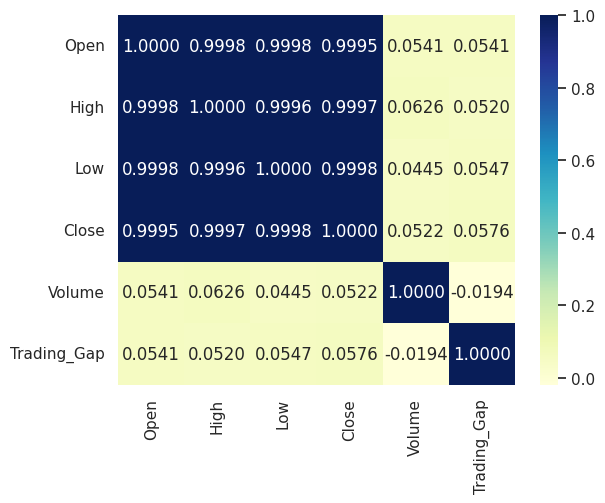

In [ ]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap='YlGnBu', fmt=".4f");

There is a weak positive correlation between trading gap and stock price as an increase in prices would lead to positive difference between the opening and closing; stock prices are also affected by several other factors as well which explains the weak correlation.

Text(0, 0.5, 'Trading Gap')

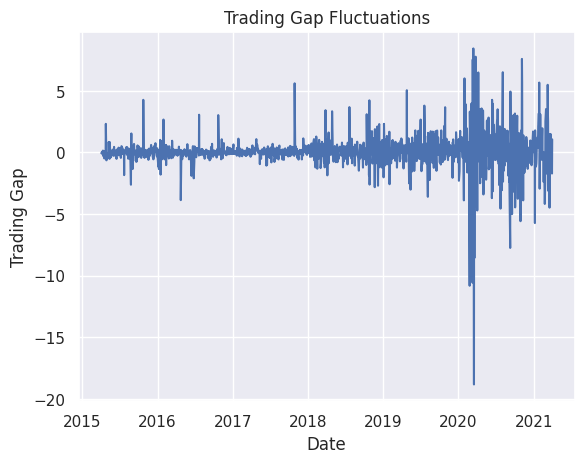

In [ ]:
plt.plot(df['Date'], df['Trading_Gap'])
plt.title('Trading Gap Fluctuations')
plt.xlabel('Date')
plt.ylabel('Trading Gap')

It is interesting to note that the fluctuations have gotten more volatile due to COVID and other events that affected the world ever since 2020 and afterwards

Next, we will illustrate the relation between trading gap and volume

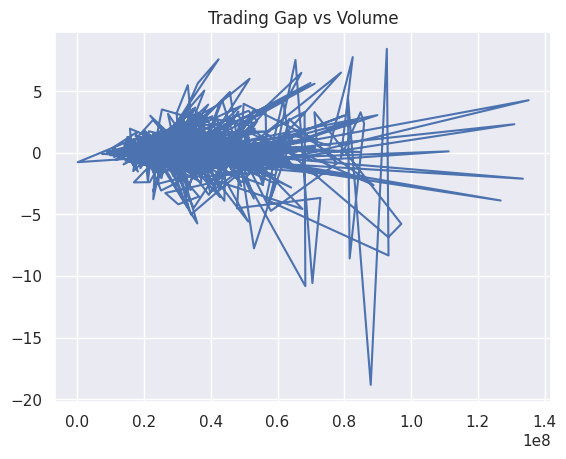

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Volume'], df['Trading_Gap'])
plt.title('Trading Gap vs Volume')
plt.show()

The graph above shows almost no correlation between volume and trading gap

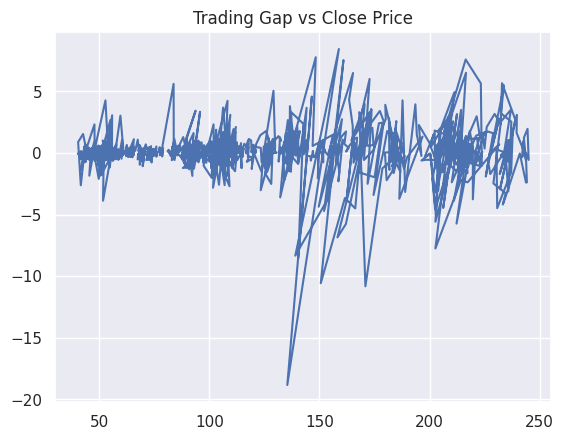

In [ ]:
ax = f.add_subplot(121)
plt.plot(df['Close'], df['Trading_Gap'])
plt.title('Trading Gap vs Close Price')
plt.show()

Based on the graph above, there is almost no correlation between closing price and trading gap as the trading gap keeps increasing then decreasing with no clear pattern regardless of the different stock prices. When the stock price was at around 150, the fluctuations had a bigger magnitude spikes and drops but that might be due to the year 2020 which was COVID year

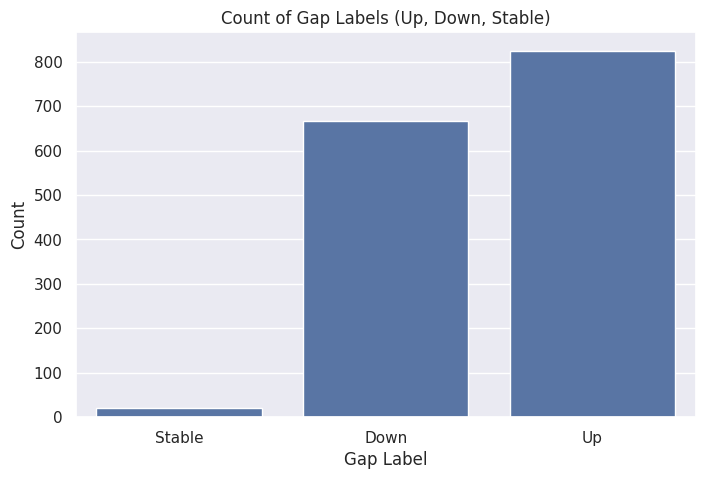

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='Gap_Label', data=df)
plt.xlabel('Gap Label')
plt.ylabel('Count')
plt.title('Count of Gap Labels (Up, Down, Stable)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Load Microsoft stock data (you can load your dataset)
# Assuming 'data' is a pandas DataFrame with Date, Open, High, Low, Close, Volume columns
# For this example, I will use only the 'Close' price for prediction
data = pd.read_csv('microsoft_stock.csv')  # Replace with your dataset path

# Set the Date column as index and sort the data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]  # Using only the Close price

# Normalize the 'Close' price for LSTM input
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Prepare data for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Number of previous days to use for predicting the next day's price
X, y = create_dataset(data_scaled, time_step)

# Reshape X to be 3D [samples, time_steps, features] as required by LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))

# Fully connected layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict the stock prices
predicted_stock_price = model.predict(X_test)

# Inverse transform to get the predicted stock prices in original scale
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Inverse transform the actual stock prices to their original scale for comparison
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Microsoft Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Microsoft Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## **Markov Model Building**

There are several different types of Markov Models:
1. Discrete Time Markov Chain (DTMC):
This is the default type and the type we were taught in the curriculum. All states are observable and there is usually no hidden patterns
2. Hidden Markov Model:
This is a type of Markov that works to find the probability of going from one state to the other given the output of a certain variable
3. Continous Time Markov Chain:
This estimates the transition matrix in the units of time rather than probability as it is continous; transitions can happen at any moment of time rather than after a certain interval of time
4. Markov Decision Process:
This Markov model works to model decision making models by maximizing the rewards. For instance, when pricing items, it would predict the next state based on the pricing that would maximize profit

In our case, we chose a regular Markov Chain, also known as Discrete Time Markov Chain, as we have changes that are daily meaning changes happen in a certain interval rather than at any point in time. There is also no hidden patterns in this specific dataset, so a Hidden Markov was excluded


**Attribute Selection**
Now, it is the time to create a Markov Chain so that we can predict the fluctuations of the stocks of Microsoft. We will use the Gap_Label as our input and output as we are trying to predict whether the stock price of the next day will increase or not. We will not need high or low since we do not care for fluctuations throughout the day. We care more about fluctuations across the days. In addition to that, we found no correlation between volume and trading gap; hence, we can eliminate it. Hence, we will just need the Gap-Label which is derived from the open and close prices.

We want to determine the next market fluctuations based on current market fluctuations, so our input attribute is the current Gap_Label, and our output attribute is the Gap_Label of the next day. This will be managed by using the same column but for the input (current), we will use it as it is; however, for the output attribute (next), we will Gap_Label but shift one down.

Now, we build our Markov Chain and print the transition matrix

In [ ]:
import pandas as pd
import numpy as np

# Calculate the transition probabilities
states = df['Gap_Label'].unique()
transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)

for i in range(len(df) - 1):  # Iterate until the second-to-last row
    prev_state = df['Gap_Label'].iloc[i]
    curr_state = df['Gap_Label'].iloc[i + 1]  # Shift down by referring to the next row
    transition_matrix.loc[prev_state, curr_state] += 1

# Convert counts to probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)


print("Transition Matrix:")
print(transition_matrix)



<ipython-input-91-a1b6db183e5f>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)


Transition Matrix:
          Stable      Down       Up
Stable  0.000000  0.500000  0.50000
Down    0.013514  0.456456  0.53003
Up      0.012136  0.427184  0.56068


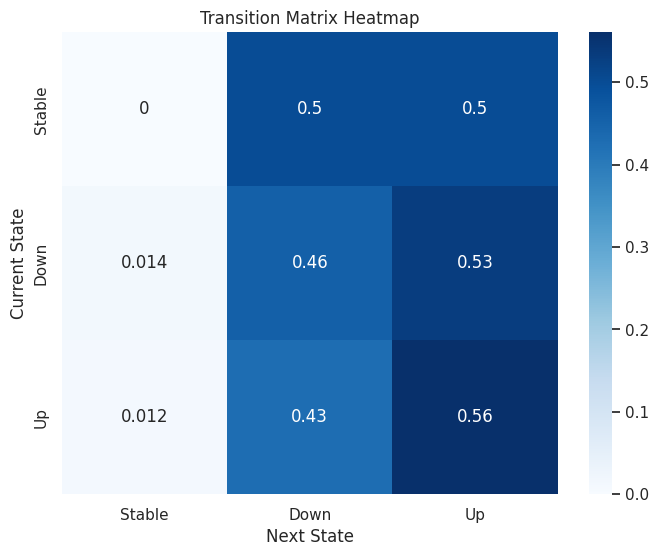

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display transition matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap="Blues", cbar=True)
plt.title("Transition Matrix Heatmap")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()


In [ ]:
!pip install networkx matplotlib


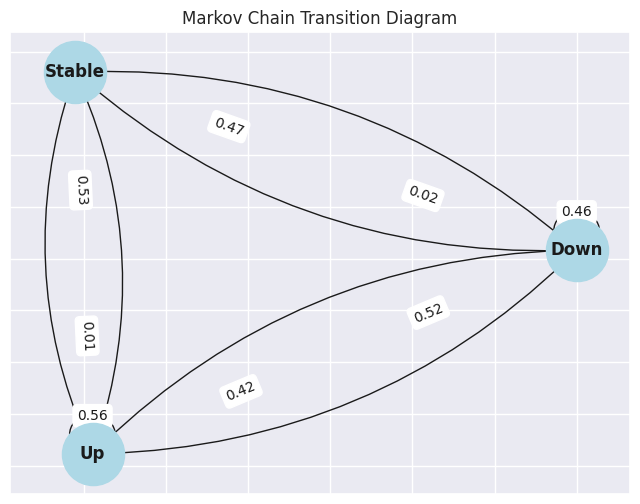

In [ ]:
plt.figure(figsize=(8, 6))

# Define layout for nodes
pos = nx.spring_layout(G, seed=42)  # Positions for nodes

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_edges(G, pos, connectionstyle="arc3,rad=0.2", arrowstyle="->", arrowsize=20)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Draw edge labels (transition probabilities)
edge_labels = {(state_from, state_to): f"{weight['weight']:.2f}"
               for state_from, state_to, weight in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.3)

# Show the plot
plt.title("Markov Chain Transition Diagram")
plt.show()

This transition matrix shows the following:

If the stock price is stable for a day, it is hard to tell if it will increase or decrease the next day.

It stock prices increases/ decreases, there is a strong likelihood (53%-56%) for it to increase again. However, there is also a strong chance (42%-45%) likelihood that it will decline. There is a rare probability that it will remain stable.

# **Markov Model Evaluation**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming your transition matrix is set up as in your code

# Prepare test data
actual_states = df['Gap_Label'][1:].values  # Actual sequence of states
predicted_states = []

for i in range(len(df['Gap_Label']) - 1):  # Iterate up to the second-to-last row
    current_state = df['Gap_Label'].iloc[i]
    # Get the state with the highest probability in the transition matrix for `current_state`
    next_state = transition_matrix.loc[current_state].idxmax()
    predicted_states.append(next_state)

# Calculate confusion matrix
cm = confusion_matrix(actual_states, predicted_states, labels=['Up', 'Down', 'Stable'])

# Create a DataFrame for a better visualization of the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=['Up', 'Down', 'Stable'], columns=['Up', 'Down', 'Stable'])

# Display confusion matrix with TP, FP, FN, TN included in the table
print("Confusion Matrix with TP, FP, FN, TN:")
print(cm_df)

# Calculate accuracy
accuracy = accuracy_score(actual_states, predicted_states)
print("\nAccuracy:", accuracy)


Confusion Matrix with TP, FP, FN, TN:
         Up  Down  Stable
Up      815    10       0
Down    656    10       0
Stable   19     0       0

Accuracy: 0.5463576158940397


This shows that the markov model predicted that the markov chain predicted that the price will always increase, disregarding all the decreases in the market which shows that this markov model is not able to accurately predict market place decrease/stable fluctuations. This is due to a weakness in our dataset that the prices tend to have a postive trend overall; hence, the decrease in prices was severely ignored. In addition to that, there are also other factors playing into price increases including pandemics, political events, etc.. which are not included in this dataset. That is a weakness in our dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False, random_state=1)

# Train the Markov Model on the training data based on transitions from current to next state
states = train_data['Gap_Label'].unique()
transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)

for i in range(len(train_data) - 1):  # Iterate up to the second-to-last row
    current_state = train_data['Gap_Label'].iloc[i]
    next_state = train_data['Gap_Label'].iloc[i + 1]
    transition_matrix.loc[current_state, next_state] += 1

# Convert counts to probabilities
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# Predict the next state for each entry in the test data based on the current state
actual_states = test_data['Gap_Label'].values
predicted_states = []

for i in range(len(test_data) - 1):  # Iterate up to the second-to-last row
    current_state = test_data['Gap_Label'].iloc[i]
    # Predict the next state based on the highest probability transition from `current_state`
    next_state = transition_matrix.loc[current_state].idxmax()
    predicted_states.append(next_state)

# Align lengths of actual and predicted states for accuracy calculation
accuracy = accuracy_score(actual_states[1:], predicted_states)  # Remove first entry in actual_states to match predicted

print("Accuracy:", accuracy)



<ipython-input-94-68e67a53cabd>:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)


Accuracy: 0.5529801324503312


Next, we decided to evaluate our Markov Model through splitting our data to training and testing. The training creates a markov model while the testing data is used to predict the next state of the dataset based on the highest probability in the transition matrix. This had an accuracy of 55% which is 1% higher than the confusion matrix; however, this might be due to the testing data having a ratio of Up Gap Labels that increased the accuracy. Hence, in order to combat this issue, we decided to also implement K-folds cross validation in order to resolve any biases that comes with splitting data into training and testing data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Prepare your data and create the k-fold cross-validator
k = 5  # number of folds
kf = KFold(n_splits=k, shuffle=False)  # No need for random_state when shuffle is False

accuracies = []

for train_index, test_index in kf.split(df):
    # Split data into training and testing sets
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]

    # Train Markov Model on train_data using current to next state transitions
    states = train_data['Gap_Label'].unique()
    transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)

    for i in range(len(train_data) - 1):  # Iterate up to the second-to-last row
        current_state = train_data['Gap_Label'].iloc[i]
        next_state = train_data['Gap_Label'].iloc[i + 1]
        transition_matrix.loc[current_state, next_state] += 1

    # Convert counts to probabilities
    transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

    # Predict the next state for each entry in test_data based on the current state
    actual_states = test_data['Gap_Label'].values
    predicted_states = []

    for i in range(len(test_data) - 1):  # Iterate up to the second-to-last row
        current_state = test_data['Gap_Label'].iloc[i]
        # Predict the next state based on the highest probability transition from `current_state`
        next_state = transition_matrix.loc[current_state].idxmax()
        predicted_states.append(next_state)

    # Align lengths of actual and predicted states for accuracy calculation
    accuracy = accuracy_score(actual_states[1:], predicted_states)  # Remove the first entry in actual_states
    accuracies.append(accuracy)

# Calculate the average accuracy over all folds
average_accuracy = np.mean(accuracies)
print(f"Average Accuracy over {k} folds:", average_accuracy)


<ipython-input-95-c245a7fab086>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)
<ipython-input-95-c245a7fab086>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transition_matrix = pd.DataFrame(index=states, columns=states).fillna(0)
<ipython-input-95-c245a7fab086>:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.

Average Accuracy over 5 folds: 0.5445446744846099


We used the K folds. Since the dataset had ony 1511 rows, we decided to divide them into 5 folds and created 5 rounds of training and testing. The accuracy of the k folds was 54.45% which is close to the Confusion matrix as well.

## **Conclusion:**



In this experiment, we were able to conclude that the Markov Chain produced an accuracy of 54% due to it only predicted that the stock price was always increase; it disregarded all the times that price stayed as it was or it decreased. For us, those are not satisfactory results at all.

This was due to that the data is right skewed and that is normal in finance as inflation would always lead to increase in price.

A weakness in our dataset is that there was no attribute that shows if an positive or negative event took place. Having such attribute would have helped us find a better pattern through using Hidden Markov Model.

In fact, stocks rely on all events; whether those happened in the past or in the present; hence, a markov chain might not be the best option as it does not take in mind the past given the present. Stock prices are in fact one of the hardest things to predict as prices rely on a lot of factors such as inflation, customer expectations, political events, pandemics, natural disasters, etc... Some of those factors are not able to be predicted; hence, it is not easy to predict it with high accuracy. However, integrated several of datasets that have the events of the world with the stock prices might help produce better results in the long run